<a href="https://colab.research.google.com/github/JonathanJuradoS/CruzeMutacion_2/blob/main/AG_Generacional_Asignacion_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Algoritmo Genético Generacional – Asignación Docente-Curso
**Objetivo:** Asignar 1000 cursos a docentes considerando especialidad, carga y nivel académico.

## 🔽 Paso 1: Cargar los datasets

In [1]:
import pandas as pd

df_docentes = pd.read_csv('docentes_2000.csv')
df_cursos = pd.read_csv('cursos_1000.csv')
df_docentes.head(), df_cursos.head()

(  docente_id    especialidad_docente  carga_maxima_docente  \
 0      D0001            Programacion                    10   
 1      D0002          Bases de Datos                    12   
 2      D0003          Bases de Datos                    16   
 3      D0004  Ingenieria de Software                    10   
 4      D0005          Bases de Datos                    10   
 
   nivel_academico_docente  
 0                Maestria  
 1               Doctorado  
 2                Maestria  
 3               Doctorado  
 4               Bachiller  ,
   curso_id especialidad_curso  horas_curso nivel_requerido_curso
 0    C0001     Bases de Datos            5              Maestria
 1    C0002       Programacion            5             Bachiller
 2    C0003       Programacion            4              Titulado
 3    C0004              Redes            4             Doctorado
 4    C0005                 IA            2             Doctorado)

## 🧠 Paso 2: Representación e Inicialización
Un individuo es una lista de 1000 posiciones donde cada valor representa un docente asignado a un curso.

In [2]:
import random

cursos = df_cursos['curso_id'].tolist()
docentes = df_docentes['docente_id'].tolist()

def crear_individuo():
    return [random.choice(docentes) for _ in cursos]

def crear_poblacion(n):
    return [crear_individuo() for _ in range(n)]

poblacion = crear_poblacion(20)

## 📏 Paso 3: Evaluación de individuos (fitness)
Evalúa compatibilidad por especialidad, no exceder la carga máxima, y cumplir el nivel requerido.

In [3]:
def obtener_info(curso_id, docente_id):
    fila_curso = df_cursos[df_cursos['curso_id'] == curso_id].iloc[0]
    fila_docente = df_docentes[df_docentes['docente_id'] == docente_id].iloc[0]
    score = 0
    if fila_curso['especialidad_curso'] == fila_docente['especialidad_docente']:
        score += 10
    if fila_curso['nivel_requerido_curso'] == fila_docente['nivel_academico_docente']:
        score += 5
    if fila_curso['horas_curso'] <= fila_docente['carga_maxima_docente']:
        score += 10
    else:
        score -= 20
    return score

def fitness(ind):
    return sum(obtener_info(curso, docente) for curso, docente in zip(cursos, ind))

## 🔄 Paso 4: Cruce y Mutación
Usamos cruce de un punto y mutación con baja probabilidad.

In [4]:
def cruce(p1, p2):
    punto = random.randint(1, len(p1) - 2)
    return p1[:punto] + p2[punto:], p2[:punto] + p1[punto:]

def mutacion(ind, tasa=0.01):
    for i in range(len(ind)):
        if random.random() < tasa:
            ind[i] = random.choice(docentes)
    return ind

## 👥 Paso 5: Selección por Torneo
Seleccionamos los mejores individuos mediante competencias aleatorias.

In [5]:
def torneo(poblacion):
    i, j = random.sample(range(len(poblacion)), 2)
    return poblacion[i] if fitness(poblacion[i]) > fitness(poblacion[j]) else poblacion[j]

## 🚀 Paso 6: Evolución Generacional

In [6]:
def evolucion(poblacion, generaciones=10):
    historial = []
    for _ in range(generaciones):
        nueva = []
        while len(nueva) < len(poblacion):
            p1 = torneo(poblacion)
            p2 = torneo(poblacion)
            h1, h2 = cruce(p1, p2)
            nueva.append(mutacion(h1))
            nueva.append(mutacion(h2))
        poblacion = nueva[:len(poblacion)]
        historial.append(fitness(max(poblacion, key=fitness)))
    return poblacion, historial

poblacion, historial = evolucion(poblacion)
mejor = max(poblacion, key=fitness)

## 📈 Paso 7: Historial del Fitness

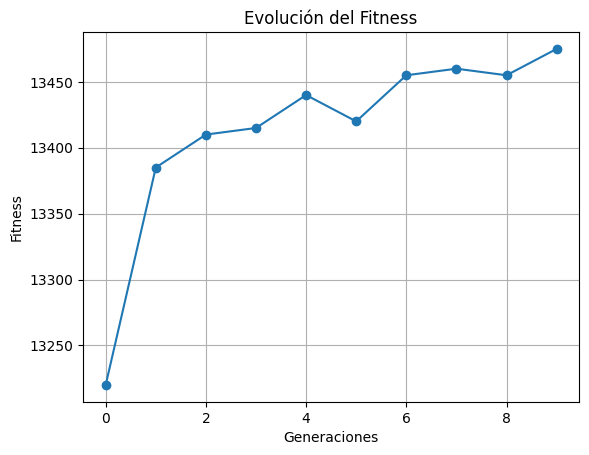

In [7]:
import matplotlib.pyplot as plt

plt.plot(historial, marker='o')
plt.title('Evolución del Fitness')
plt.xlabel('Generaciones')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()

## 📤 Paso 8: Exportar a Excel la Mejor Asignación

In [8]:
asignaciones = list(zip(cursos, mejor))
df_asignacion = pd.DataFrame(asignaciones, columns=['curso_id', 'docente_id'])
df_export = pd.merge(df_asignacion, df_cursos, on='curso_id')
df_export = pd.merge(df_export, df_docentes, on='docente_id')
df_export.to_excel('AG_Generacional_Asignaciones.xlsx', index=False)
df_export.head()

,curso_id,docente_id,especialidad_curso,horas_curso,nivel_requerido_curso,especialidad_docente,carga_maxima_docente,nivel_academico_docente
0,C0001,D0340,Bases de Datos,5,Maestria,Ingenieria de Software,14,Maestria
1,C0002,D1598,Programacion,5,Bachiller,IA,12,Bachiller
2,C0003,D0157,Programacion,4,Titulado,Programacion,14,Bachiller
3,C0004,D1766,Redes,4,Doctorado,IA,10,Doctorado
4,C0005,D0060,IA,2,Doctorado,Ingenieria de Software,10,Bachiller


<ipython-input-9-7becaa01b9b7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_export, x='horas_curso', y='nivel_academico_docente', inner='box', palette='Dark2')


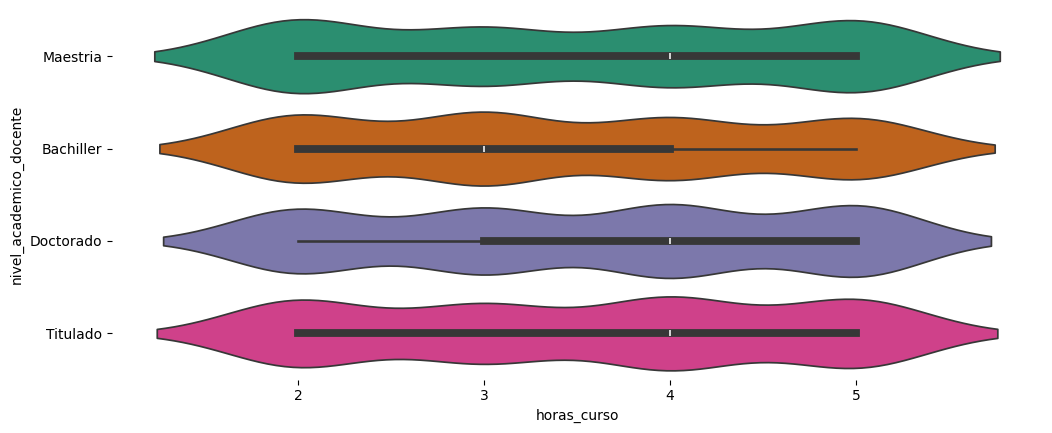

In [9]:
# @title nivel_academico_docente vs horas_curso

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_export['nivel_academico_docente'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_export, x='horas_curso', y='nivel_academico_docente', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## ✅ Conclusiones por Fase
- **Representación:** Uso de listas simples, una entrada por curso.
- **Inicialización:** Diversidad inicial permite evitar soluciones locales pobres.
- **Fitness:** Refuerza coincidencias y penaliza sobrecargas.
- **Cruce/Mutación:** Permite evolución efectiva del conjunto de asignaciones.
- **Generacional:** Al renovar toda la población, la presión selectiva es más efectiva para convergencia.